## Preliminearies

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# styling
sns.set_theme(style="whitegrid")

df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [39]:
print("Missing values per column:\n", df.isnull().sum())

# Basic statistics
df.describe(include='all')

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


## PLOTS

### Line Plot

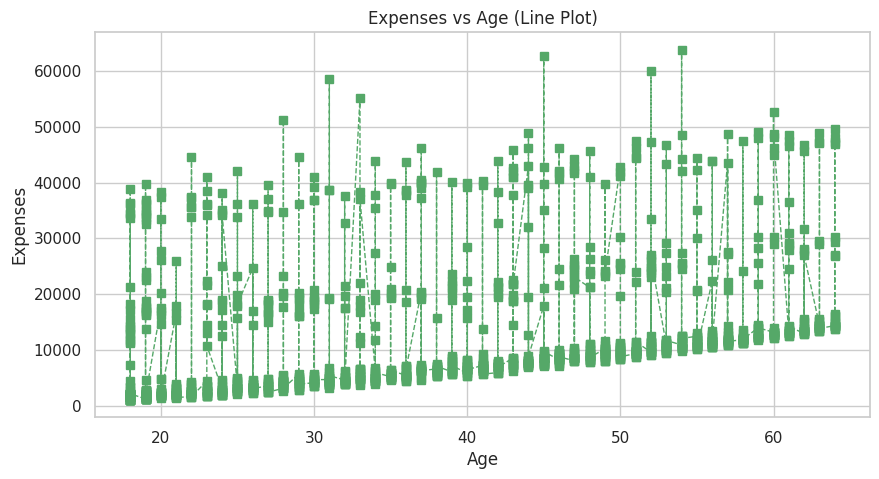

In [40]:
df_sorted_by_age = df.sort_values(by='age')

plt.figure(figsize=(10, 5))
plt.plot(df_sorted_by_age['age'], df_sorted_by_age['expenses'], marker='s', color='g', linestyle='--', linewidth=1)
plt.title('Expenses vs Age (Line Plot)')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()


### Bar Plot

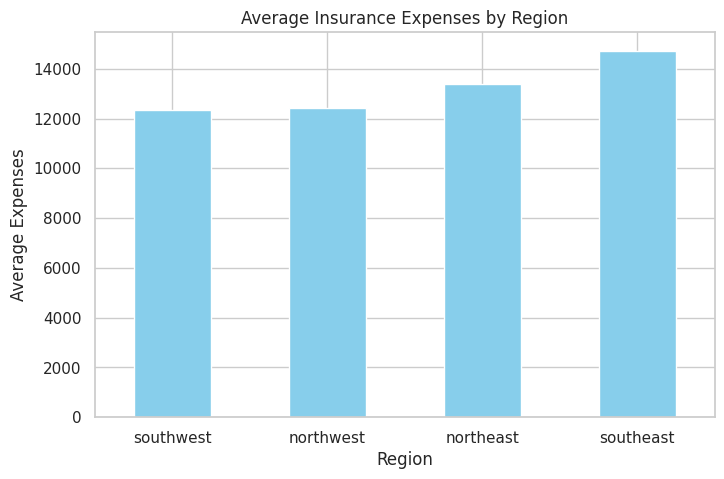

In [41]:
avg_expenses_by_region = df.groupby('region')['expenses'].mean().sort_values()
plt.figure(figsize=(8, 5))
avg_expenses_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Insurance Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.show()

### HISTOGRAM

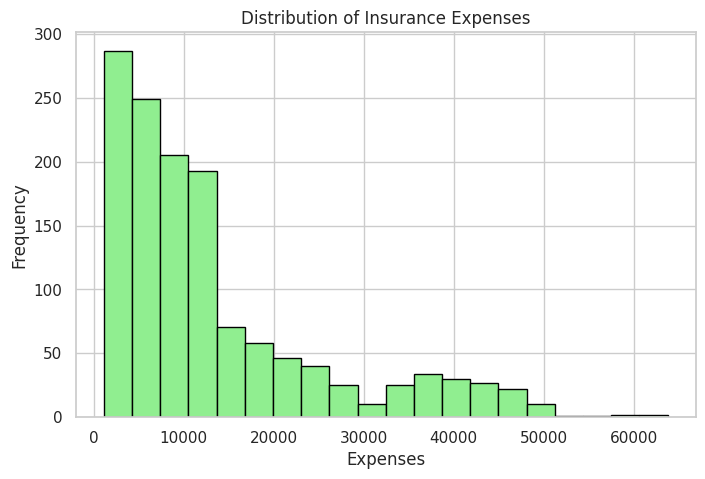

In [42]:
plt.figure(figsize=(8, 5))
plt.hist(df['expenses'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Insurance Expenses')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

### SCATTER PLOT

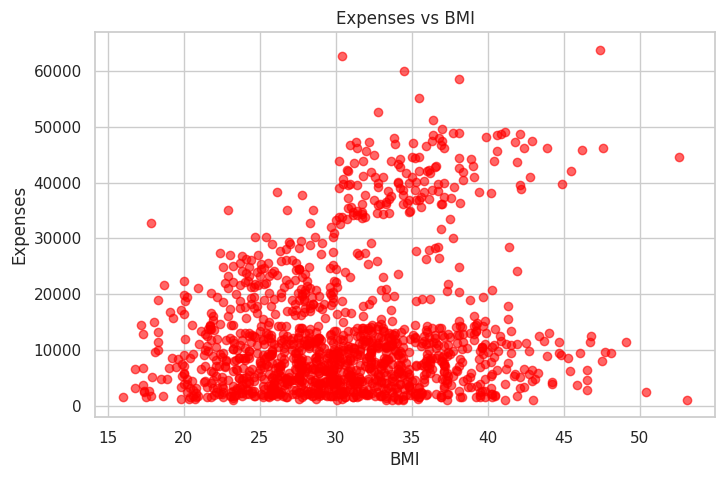

In [43]:
plt.figure(figsize=(8, 5))
plt.scatter(df['bmi'], df['expenses'], alpha=0.6, c='red')
plt.title('Expenses vs BMI')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.show()


### PIE CHART

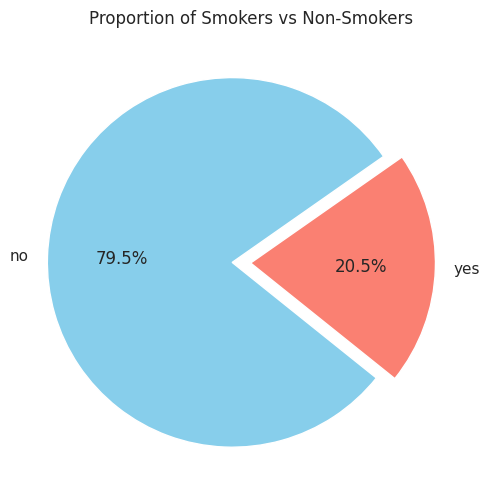

In [44]:
smoker_counts = df['smoker'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=35, colors=['skyblue', 'salmon'], explode=(0.1, 0))
plt.title('Proportion of Smokers vs Non-Smokers')
plt.show()

### BOX PLOT

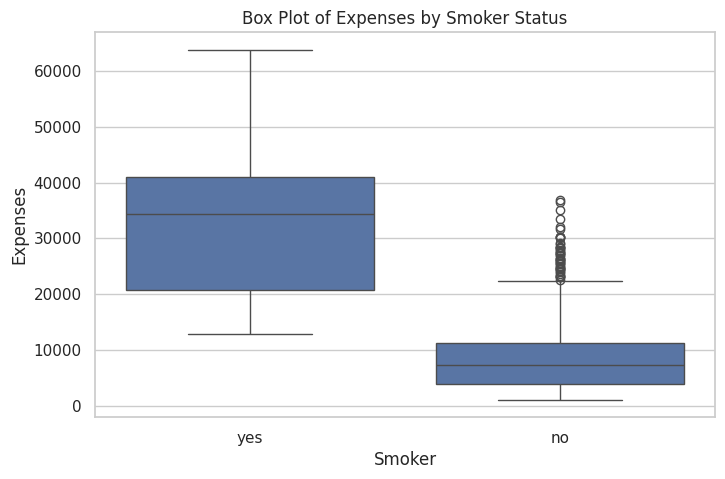

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='smoker', y='expenses')
plt.title('Box Plot of Expenses by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Expenses')
plt.show()

### Data Transformation for Categorical Variables

In [48]:
gender_dict = {"male" : 0, "female" : 1}
smoker_dict = {"no" : 0, "yes" : 1}
region_dict = {"southwest" : 0, "southeast" : 1, "northwest" : 2, "northeast" : 3}
df['sex'] = df['sex'].map(gender_dict)
df['smoker'] = df['smoker'].map(smoker_dict)
df['region'] = df['region'].map(region_dict)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


### HEATMAP

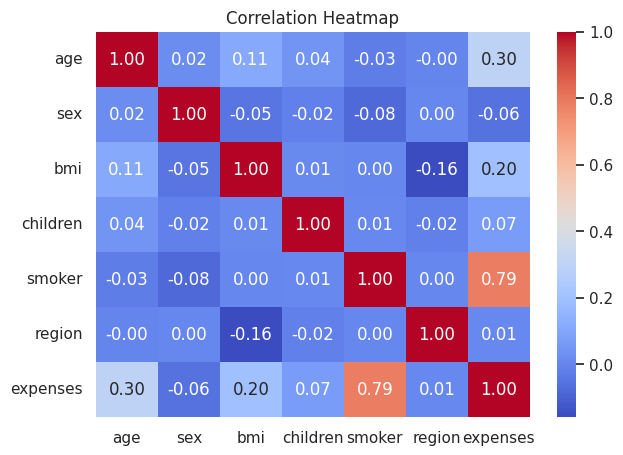

In [49]:
corr_matrix = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### STACK PLOT

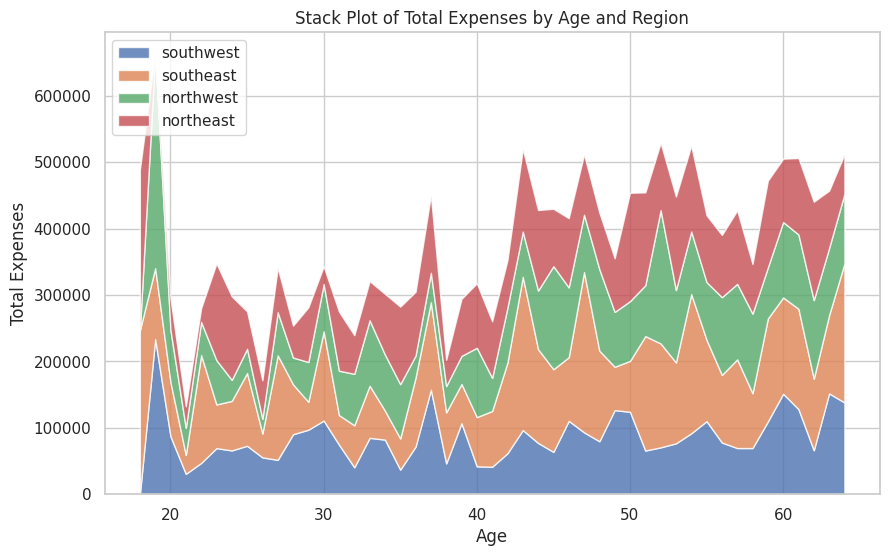

In [51]:
# Reverse mapping for regions
reverse_region_dict = {v: k for k, v in region_dict.items()}

# Get ages and values
ages = pivot_data.index
regions = pivot_data.columns
values = [pivot_data[region] for region in regions]

# Convert numeric region labels back to their original names
region_labels = [reverse_region_dict[region] for region in regions]

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(ages, *values, labels=region_labels, alpha=0.8)
plt.title('Stack Plot of Total Expenses by Age and Region')
plt.xlabel('Age')
plt.ylabel('Total Expenses')
plt.legend(loc='upper left')
plt.show()
